# Photo Classifier: Model evaluation

## Imports

In [1]:
from IPython.core.interactiveshell import InteractiveShell
%matplotlib inline
%load_ext autoreload
%autoreload 2
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import random
import numpy as np
import pandas as pd
from collections import Counter
from ipywidgets import interact
import ipywidgets as widgets

In [3]:
from file_io import load_pickle_file
from constants import *
from image_transforms import IMAGE_TRANSFORMS

In [4]:
import random
random.seed(42)

In [5]:
if IS_MULTILABEL_CLASSIFICATION:
    from interpreters import MultiLabelInterpreter
    Interpreter = MultiLabelInterpreter
else:
    from interpreters import SingleLabelInterpreter
    Interpreter = SingleLabelInterpreter

In [6]:
DATA_SET = 'test'

## Load model and data

In [7]:
model = load_pickle_file(MODEL_FILE_PATH)
image_data = load_pickle_file(IMAGE_DATA_PATH)

## Prediction

In [8]:
x = image_data.get_images(DATA_SET)
y_true = image_data.get_classes(DATA_SET)

In [9]:
y_pred, probabilities = model.predict(x, IMAGE_TRANSFORMS[DATA_SET])

## Results interpretation

In [10]:
interpreter = Interpreter(x, y_pred, y_true, probabilities, model.class_to_label_mapping)

In [11]:
accuracy = interpreter.calculate_accuracy()
accuracy

0.9363636363636364

In [12]:
accuracy_by_label = interpreter.calculate_accuracy_by_label()
accuracy_by_label

dog    0.981818
cat    0.890909
dtype: float64

In [13]:
confusion_matrix = interpreter.calculate_confusion_matrix()
confusion_matrix

Confusion matrix is not implemented for multilabel classification


In [14]:
most_incorrect_samples = interpreter.get_most_incorrect_samples(5)
most_incorrect_samples

,prediction_error,dog_prediction,cat_prediction,dog_true,cat_true,confidence
27,0.489924,0.999495,0.979343,1,0,0.978838
24,0.459843,0.974941,0.105372,1,1,0.869569
25,0.444846,0.883023,0.993331,0,1,0.876354
6,0.430193,0.999536,0.859922,1,0,0.859458
45,0.378976,0.999890,0.757841,1,0,0.757731


In [15]:
most_uncertain_samples = interpreter.get_most_uncertain_samples(5)
most_uncertain_samples

,prediction_error,dog_prediction,cat_prediction,dog_true,cat_true,confidence
42,0.225409,0.751759,0.797423,1,1,0.549183
7,0.217149,0.950851,0.614852,1,1,0.565703
44,0.205561,0.988995,0.599883,1,1,0.588878
0,0.176720,0.979997,0.666564,1,1,0.646560
46,0.366577,0.964117,0.697270,1,0,0.661387


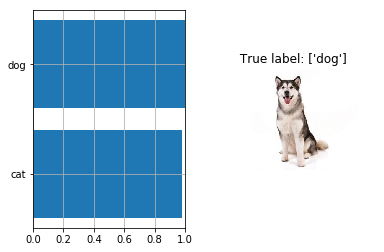

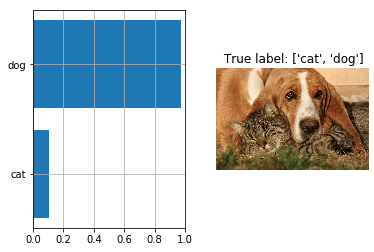

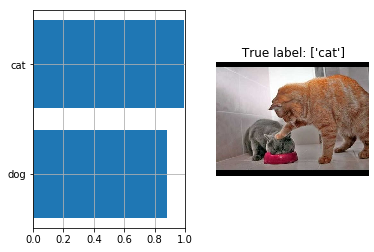

In [16]:
interpreter.plot_most_incorrect_samples(3)

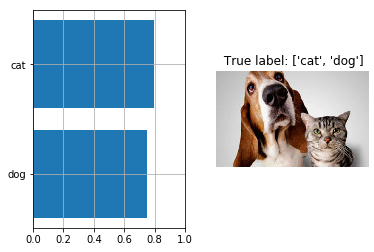

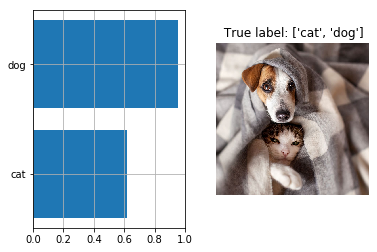

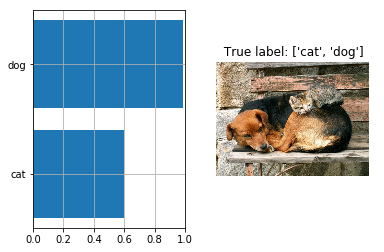

In [17]:
interpreter.plot_most_uncertain_samples(3)

In [18]:
@interact(index=widgets.IntSlider(min=0, max=len(y_true)-1, step=1, value=0, continuous_update=False))
def show_prediction(index=0):
    interpreter.plot_prediction(index)

interactive(children=(IntSlider(value=0, continuous_update=False, description='index', max=54), Output()), _do…